<a href="https://colab.research.google.com/github/JamshedAl/Tesla_Stock_Prediction_System/blob/main/Tesla_Stock_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import csv
import pandas 
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['TSLA']
from datetime import datetime
startdate = datetime(2022,1,1)
enddate = datetime.now()
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
data.to_csv("stock_data.csv")


[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd
data = pd.read_csv("/content/stock_data.csv")

In [ ]:
data = data[["Date","Close"]]

In [ ]:
data.columns = ["ds","y"]

In [ ]:
data

,ds,y
0,2022-01-03,399.926666
1,2022-01-04,383.196655
2,2022-01-05,362.706665
3,2022-01-06,354.899994
4,2022-01-07,342.320007
...,...,...
347,2023-05-22,188.869995
348,2023-05-23,185.770004
349,2023-05-24,182.899994
350,2023-05-25,184.470001


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 67.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install cmdstanpy==0.9.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.3 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
from fbprophet import Prophet

In [ ]:
prophet = Prophet(daily_seasonality= True)
prophet.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future_dates = prophet.make_future_dataframe(periods = 365)
predictions = prophet.predict(future_dates)

In [ ]:
# Python
forecast = prophet.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2022-01-03,338.735984,301.095566,376.086663
1,2022-01-04,335.243682,298.616292,374.587111
2,2022-01-05,335.291773,299.833158,372.951875
3,2022-01-06,333.115299,296.784425,370.807549
4,2022-01-07,330.828123,293.656553,366.774215
...,...,...,...,...
611,2023-12-26,-326.031153,-486.140490,-163.835165
612,2023-12-27,-326.804141,-491.238853,-165.632200
613,2023-12-28,-329.801695,-491.355806,-172.565953
614,2023-12-29,-332.909951,-499.521098,-172.967330


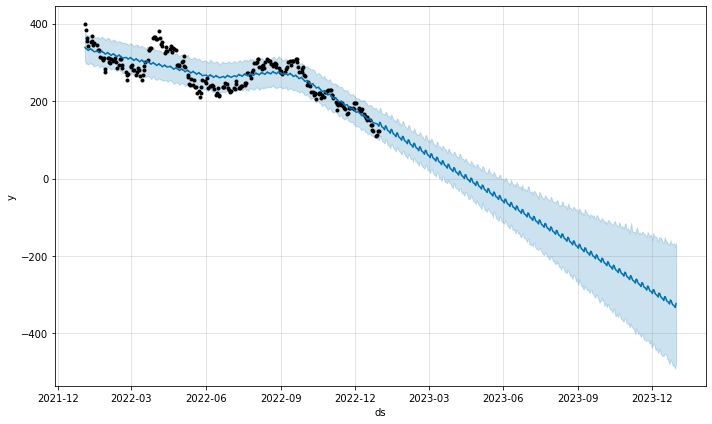

In [ ]:
fig1 = prophet.plot(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
plot_plotly(prophet, predictions)

In [ ]:
unknown_data = data.iloc[-90:]
data = data.iloc[:-90]

In [ ]:
prophet = Prophet(daily_seasonality= True)
prophet.fit(data)

future_dates = prophet.make_future_dataframe(periods = 365)
predictions = prophet.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
plot_plotly(prophet, predictions)

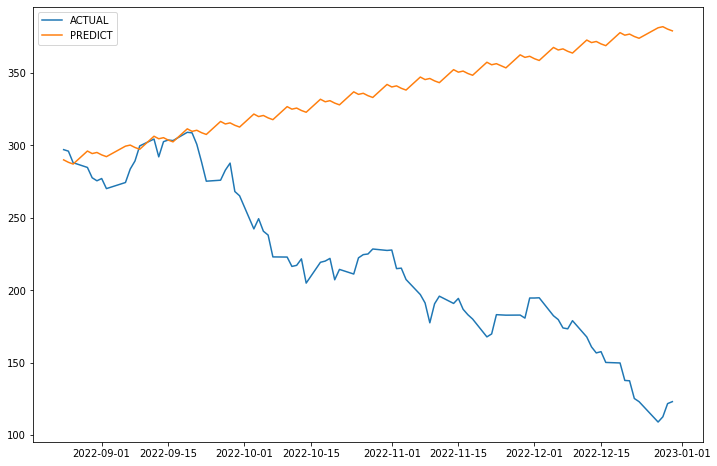

In [ ]:
from ipywidgets import Label
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

plt.plot(pd.to_datetime(unknown_data['ds']), unknown_data['y'], label="ACTUAL")
plt.plot(pd.to_datetime(unknown_data['ds']), pred['yhat'], label="PREDICT")
plt.legend()